# PHC status Prediction

In [1]:
#### Importing Dependenceis

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

#### Data Importing

In [2]:
#loading the dataset
df = pd.read_csv('dataset/cleaned_data.csv', index_col=0)
df.head()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status,bmi,wh
0,59,1,0,0,0,0,0,0,1,0,...,78,234.0,NaN,0,0,94,4.3,3,20.85,1.06
1,60,1,1,1,0,1,0,0,0,1,...,67,93.6,NaN,0,0,62,5.8,2,27.48,0.96
2,58,1,1,1,1,1,0,0,0,1,...,81,133.2,NaN,0,0,60,7.0,3,31.12,0.99
3,50,2,1,0,0,1,1,0,0,0,...,65,75.6,10.9,0,0,82,3.6,2,22.05,0.85
4,56,1,1,0,0,1,0,0,0,1,...,98,223.2,NaN,0,0,92,5.0,3,25.35,0.96


In [3]:
# numbers of rows and columns
df.shape

(50, 28)

In [4]:
# checking for missing values
df.isnull().sum()

age                   0
gender                0
limit_diet            0
gain_10kg             0
gain_lose_3kg         0
eat_2h_sleep          0
soft_drink            0
fast_food             0
skip_breakfast        0
eat_faster            0
walking_habit         0
physical_activity     0
walk_faster           0
sleep_habit           0
stop_activity         0
body_temperature      0
spo2                  0
bp_sys                0
bp_dia                0
blood_glucose         0
blood_hemoglobin     43
urinary_glucose       0
urinary_protein       0
pulse_rate            0
uric_acid             0
health_status         0
bmi                   0
wh                    0
dtype: int64

### Data analysis and visualization

In [5]:
# statistical measures of the dataset
df.describe()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status,bmi,wh
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,...,50.000000,50.000000,7.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,53.960000,1.14000,0.740000,0.900000,0.460000,0.420000,0.10000,0.14000,0.020000,0.580000,...,80.980000,136.008000,10.871429,0.020000,0.020000,77.200000,6.596000,3.000000,25.565800,0.956200
std,4.840138,0.35051,0.443087,1.092647,0.613122,0.498569,0.46291,0.35051,0.141421,0.784805,...,8.077406,52.033364,0.692133,0.141421,0.141421,12.480188,1.624551,0.832993,3.062229,0.067063
min,36.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,65.000000,70.200000,9.800000,0.000000,0.000000,56.000000,3.600000,1.000000,19.790000,0.640000
25%,50.500000,1.00000,0.250000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,75.000000,92.250000,10.600000,0.000000,0.000000,67.500000,5.500000,2.250000,23.400000,0.940000
50%,55.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,82.000000,123.300000,10.900000,0.000000,0.000000,76.000000,6.800000,3.000000,25.155000,0.960000
75%,58.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,0.00000,0.000000,1.000000,...,84.000000,174.600000,11.050000,0.000000,0.000000,88.000000,7.825000,4.000000,26.980000,0.990000
max,60.000000,2.00000,1.000000,3.000000,3.000000,1.000000,3.00000,1.00000,1.000000,3.000000,...,105.000000,257.400000,12.100000,1.000000,1.000000,105.000000,10.700000,4.000000,33.720000,1.060000


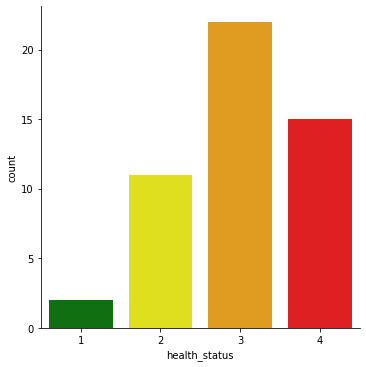

In [6]:
# number of values for each values
sns.catplot(x='health_status', data=df, kind = 'count', palette={1:"green", 2:"yellow", 3:'orange', 4:'red'})

#### Correlation

    1.Positive Correlation
    2.Negative COrrelation

<AxesSubplot:>

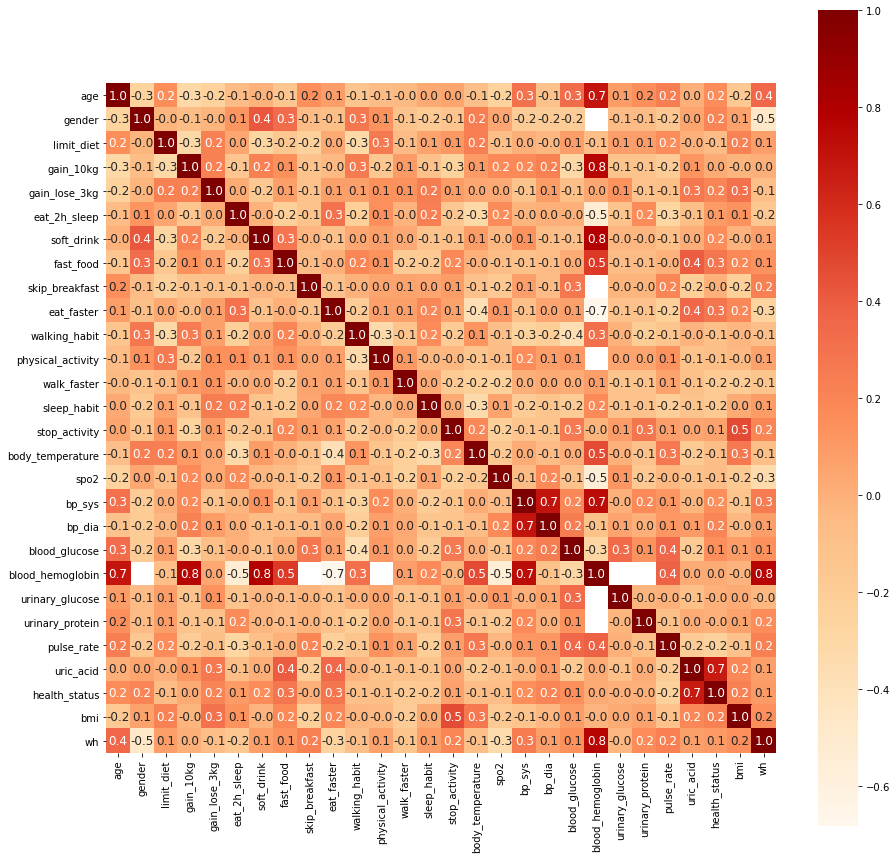

In [7]:
correlation = df.corr()

# constructing a heatmap to undestand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap = 'OrRd')

#### Data Preprocessing

In [8]:
# seperate the data and label

data = df.drop(['health_status', 'blood_hemoglobin'], axis=1)
label = df.health_status
print(data)

    age  gender  limit_diet  gain_10kg  gain_lose_3kg  eat_2h_sleep  \
0    59       1           0          0              0             0   
1    60       1           1          1              0             1   
2    58       1           1          1              1             1   
3    50       2           1          0              0             1   
4    56       1           1          0              0             1   
5    59       1           1          0              0             1   
6    59       1           1          0              0             0   
7    57       1           1          0              1             1   
8    45       1           0          1              0             1   
9    58       1           1          0              0             1   
10   58       2           0          3              0             0   
11   56       1           1          1              1             1   
12   58       1           1          3              0             1   
13   5

#### Label Binarization

#### Training and Test Data

In [9]:
# seperating traing and test data
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=2)

print(data.shape, data_train.shape, data_test.shape)

(50, 26) (40, 26) (10, 26)


### Model Training
#### Random Forest  Classifier

In [10]:
model = RandomForestClassifier()

model.fit(data_train, label_train)

RandomForestClassifier()

### Model Evaluation
#### Accuracy Score

In [11]:
# accuracy test on data
data_test_prediction = model.predict(data_test)
test_data_accuracy = accuracy_score(data_test_prediction, label_test)

print('Accuracy : ', test_data_accuracy* 100)

Accuracy :  50.0


In [12]:
### Building the predictive System

# input_data = (6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.5,11.0)
# input_data = np.asarray(input_data)
# input_data = input_data.reshape(1, -1)
# prediction = model.predict(input_data)
# if prediction[0]==1:
#     print("Good Quality")
# else:
#     print("Poor Quality")